In [22]:
import pandas as pd
from os.path import join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib as mpl
mpl.style.use('seaborn-whitegrid')
plt.rcParams["figure.figsize"] = [10, 12]

In [7]:
Lmin = 2
Lmax = 22
WINDOW_SIZE = 5
PUP_SIZE_SCALE = 0.004
results = join('..', 'results', 'results_pup')

# Relational options on correctness

In [9]:
### DATA LOADING
corr_lev_easy = pd.read_csv(join(results, 'dynamics_LEV_EASY_CORR.csv'))
corr_lev_med = pd.read_csv(join(results, 'dynamics_LEV_MED_CORR.csv'))
corr_lev_hard = pd.read_csv(join(results, 'dynamics_LEV_HARD_CORR.csv'))

err_lev_easy = pd.read_csv(join(results, 'dynamics_LEV_EASY_ERR.csv'))
err_lev_med = pd.read_csv(join(results, 'dynamics_LEV_MED_ERR.csv'))
err_lev_hard = pd.read_csv(join(results, 'dynamics_LEV_HARD_ERR.csv'))


# Correct trials aggregated over item types
T1 = pd.read_csv(join(results, '1.csv'))
T2 = pd.read_csv(join(results, '2.csv'))
T3 = pd.read_csv(join(results, '3.csv'))
T4 = pd.read_csv(join(results, '4.csv'))
T5 = pd.read_csv(join(results, '5.csv'))
T6 = pd.read_csv(join(results, '6.csv'))
T7 = pd.read_csv(join(results, '7.csv'))


#CORRECTIONS LOADING
CI_corr_lev_easy = pd.read_csv(join(results, 'dynamics_CI_CORR_LEV_EASY.csv'))
CI_corr_lev_med = pd.read_csv(join(results, 'dynamics_CI_CORR_LEV_MED.csv'))
CI_corr_lev_hard = pd.read_csv(join(results, 'dynamics_CI_CORR_LEV_HARD.csv'))

CI_err_lev_easy = pd.read_csv(join(results, 'dynamics_CI_ERR_LEV_EASY.csv'))
CI_err_lev_med = pd.read_csv(join(results, 'dynamics_CI_ERR_LEV_MED.csv'))
CI_err_lev_hard = pd.read_csv(join(results, 'dynamics_CI_ERR_LEV_HARD.csv'))

corr_lev_easy['AVG_RMx'] *= 100
corr_lev_med['AVG_RMx'] *= 100
corr_lev_hard['AVG_RMx'] *= 100
err_lev_easy['AVG_RMx'] *= 100
err_lev_med['AVG_RMx'] *= 100
err_lev_hard['AVG_RMx'] *= 100

T1['AVG_RMx'] *= 100
T2['AVG_RMx'] *= 100
T3['AVG_RMx'] *= 100
T4['AVG_RMx'] *= 100
T5['AVG_RMx'] *= 100
T6['AVG_RMx'] *= 100
T7['AVG_RMx'] *= 100

CI_corr_lev_easy['RMx_STD'] *= 100
CI_corr_lev_med['RMx_STD'] *= 100
CI_corr_lev_hard['RMx_STD'] *= 100

CI_err_lev_easy['RMx_STD'] *= 100
CI_err_lev_med['RMx_STD'] *= 100
CI_err_lev_hard['RMx_STD'] *= 100

corr_lev_easy['PROP_PSOx'] /= WINDOW_SIZE
corr_lev_med['PROP_PSOx'] /= WINDOW_SIZE
corr_lev_hard['PROP_PSOx'] /= WINDOW_SIZE

err_lev_easy['PROP_PSOx'] /= WINDOW_SIZE
err_lev_med['PROP_PSOx'] /= WINDOW_SIZE
err_lev_hard['PROP_PSOx'] /= WINDOW_SIZE

corr_lev_easy['PSOx_STD'] /= WINDOW_SIZE
corr_lev_med['PSOx_STD'] /= WINDOW_SIZE
corr_lev_hard['PSOx_STD'] /= WINDOW_SIZE

err_lev_easy['PSOx_STD'] /= WINDOW_SIZE
err_lev_med['PSOx_STD'] /= WINDOW_SIZE
err_lev_hard['PSOx_STD'] /= WINDOW_SIZE

corr_lev_easy['PROP_PSOx'] *= PUP_SIZE_SCALE
corr_lev_med['PROP_PSOx'] *= PUP_SIZE_SCALE
corr_lev_hard['PROP_PSOx'] *= PUP_SIZE_SCALE

err_lev_easy['PROP_PSOx'] *= PUP_SIZE_SCALE
err_lev_med['PROP_PSOx'] *= PUP_SIZE_SCALE
err_lev_hard['PROP_PSOx'] *= PUP_SIZE_SCALE

corr_lev_easy['PSOx_STD'] *= PUP_SIZE_SCALE
corr_lev_med['PSOx_STD'] *= PUP_SIZE_SCALE
corr_lev_hard['PSOx_STD'] *= PUP_SIZE_SCALE

err_lev_easy['PSOx_STD'] *= PUP_SIZE_SCALE
err_lev_med['PSOx_STD'] *= PUP_SIZE_SCALE
err_lev_hard['PSOx_STD'] *= PUP_SIZE_SCALE

corr_lev_easy = corr_lev_easy[2:]
corr_lev_med = corr_lev_med[2:]
corr_lev_hard = corr_lev_hard[2:]

err_lev_easy = err_lev_easy[2:]
err_lev_med = err_lev_med[2:]
err_lev_hard = err_lev_hard[2:]

CI_corr_lev_easy = CI_corr_lev_easy[2:]
CI_corr_lev_med = CI_corr_lev_med[2:]
CI_corr_lev_hard = CI_corr_lev_hard[2:]

CI_err_lev_easy = CI_err_lev_easy[2:]
CI_err_lev_med = CI_err_lev_med[2:]
CI_err_lev_hard = CI_err_lev_hard[2:]
T1 = T1[2:]
T2 = T2[2:]
T3 = T3[2:]
T4 = T4[2:]
T5 = T5[2:]
T6 = T6[2:]
T7 = T7[2:]

In [10]:
def add_CI(data, param, corr = None):
    N = {'PROP_FOx': 'Kx', 'AVG_RMx': 'RMk', 'PROP_PSOx': 'Kx'}[param]
    STD = {'PROP_FOx': 'FOx_STD', 'AVG_RMx': 'RMx_STD', 'PROP_PSOx':'PSOx_STD'}[param]
    if not (corr is None):
        data[param + '_low_CI'] = data[param] - (1.96 * corr[STD] / np.sqrt(corr[N]))
        data[param + '_high_CI'] = data[param] + (1.96 * corr[STD] / np.sqrt(corr[N]))
    else:
        data[param + '_low_CI'] = data[param] - (1.96 * data[STD] / np.sqrt(data[N]))
        data[param + '_high_CI'] = data[param] + (1.96 * data[STD] / np.sqrt(data[N]))

In [11]:
add_CI(corr_lev_easy, 'AVG_RMx', corr = CI_corr_lev_easy)
add_CI(err_lev_easy,'AVG_RMx', corr = CI_err_lev_easy)
add_CI(corr_lev_med, 'AVG_RMx', corr = CI_corr_lev_med)
add_CI(err_lev_med,'AVG_RMx', corr = CI_err_lev_med)
add_CI(corr_lev_hard, 'AVG_RMx', corr = CI_corr_lev_hard)
add_CI(err_lev_hard,'AVG_RMx', corr = CI_err_lev_hard)

# PUP size

<IPython.core.display.Javascript object>


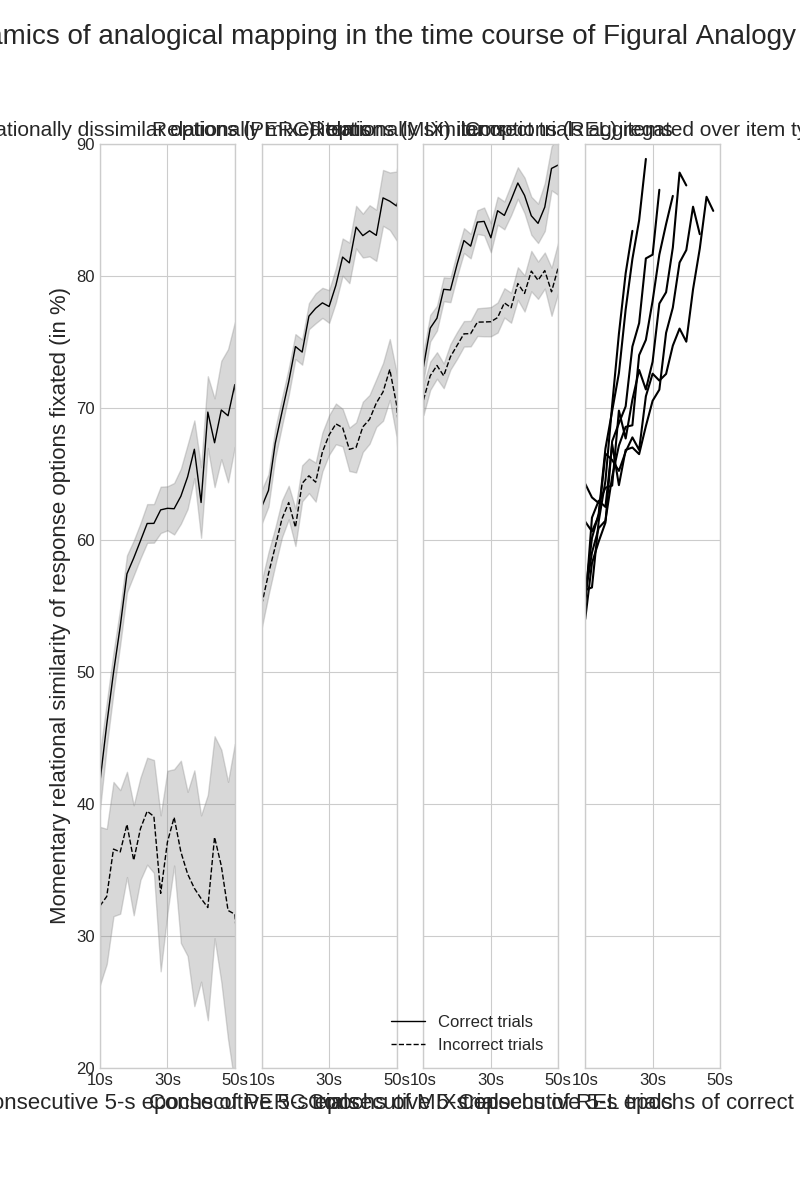

In [21]:

# Define a function for the line plot with intervals
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True)


# Plot the data, set the linewidth, color and transparency of the
# line, provide a label for the legend
ax1.plot([(x * WINDOW_SIZE)-10 for x in corr_lev_easy['AVG_RMx'].index.tolist()],
        corr_lev_easy['AVG_RMx'].tolist(),
        lw = 1,
        color = 'black',
        alpha = 1,
        label = 'Correct trials')
# Shade the confidence interval
ax1.fill_between([(x * WINDOW_SIZE)-10 for x in corr_lev_easy['AVG_RMx'].index.tolist()],
                corr_lev_easy['AVG_RMx_low_CI'],
                corr_lev_easy['AVG_RMx_high_CI'], 
                color = 'gray',
                alpha = 0.3)

ax1.plot([(x * WINDOW_SIZE)-10 for x in err_lev_easy['AVG_RMx'].index.tolist()],
        err_lev_easy['AVG_RMx'].tolist(),'--', 
        lw = 1,
        color = 'black',
        alpha = 1,
        label = 'Incorrect trials')
# Shade the confidence interval
ax1.fill_between([(x * WINDOW_SIZE)-10 for x in err_lev_easy['AVG_RMx'].index.tolist()],
                err_lev_easy['AVG_RMx_low_CI'],
                err_lev_easy['AVG_RMx_high_CI'], 
                color = 'gray',
                alpha = 0.3)


# Plot the data, set the linewidth, color and transparency of the
# line, provide a label for the legend
ax2.plot([(x * WINDOW_SIZE)-10 for x in corr_lev_med['AVG_RMx'].index.tolist()],
        corr_lev_med['AVG_RMx'].tolist(),
        lw = 1,
        color = 'black',
        alpha = 1,
        label = 'Correct trials')
# Shade the confidence interval
ax2.fill_between([(x * WINDOW_SIZE)-10 for x in corr_lev_med['AVG_RMx'].index.tolist()],
                corr_lev_med['AVG_RMx_low_CI'],
                corr_lev_med['AVG_RMx_high_CI'], 
                color = 'gray',
                alpha = 0.3)

ax2.plot([(x * WINDOW_SIZE)-10 for x in err_lev_med['AVG_RMx'].index.tolist()],
        err_lev_med['AVG_RMx'].tolist(),'--', 
        lw = 1,
        color = 'black',
        alpha = 1,
        label = 'Incorrect trials')
# Shade the confidence interval
ax2.fill_between([(x * WINDOW_SIZE)-10 for x in err_lev_med['AVG_RMx'].index.tolist()],
                err_lev_med['AVG_RMx_low_CI'],
                err_lev_med['AVG_RMx_high_CI'], 
                color = 'gray',
                alpha = 0.3)


# Plot the data, set the linewidth, color and transparency of the
# line, provide a label for the legend
ax3.plot([(x * WINDOW_SIZE)-10 for x in corr_lev_hard['AVG_RMx'].index.tolist()],
        corr_lev_hard['AVG_RMx'].tolist(),
        lw = 1,
        color = 'black',
        alpha = 1,
        label = 'Correct trials')
# Shade the confidence interval
ax3.fill_between([(x * WINDOW_SIZE)-10 for x in corr_lev_hard['AVG_RMx'].index.tolist()],
                corr_lev_hard['AVG_RMx_low_CI'],
                corr_lev_hard['AVG_RMx_high_CI'], 
                color = 'gray',
                alpha = 0.3)

ax3.plot([(x * WINDOW_SIZE)-10 for x in err_lev_hard['AVG_RMx'].index.tolist()],
        err_lev_hard['AVG_RMx'].tolist(), '--', 
        lw = 1,
        color = 'black',
        alpha = 1,
        label = 'Incorrect trials')
# Shade the confidence interval
ax3.fill_between([(x * WINDOW_SIZE)-10 for x in err_lev_hard['AVG_RMx'].index.tolist()],
                err_lev_hard['AVG_RMx_low_CI'],
                err_lev_hard['AVG_RMx_high_CI'], 
                color = 'gray',
                alpha = 0.3)

ax4.plot([(x * WINDOW_SIZE)-10 for x in T1['AVG_RMx'].index.tolist()], T1['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')
ax4.plot([(x * WINDOW_SIZE)-10 for x in T2['AVG_RMx'].index.tolist()], T2['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')
ax4.plot([(x * WINDOW_SIZE)-10 for x in T3['AVG_RMx'].index.tolist()], T3['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')
ax4.plot([(x * WINDOW_SIZE)-10 for x in T4['AVG_RMx'].index.tolist()], T4['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')
ax4.plot([(x * WINDOW_SIZE)-10 for x in T5['AVG_RMx'].index.tolist()], T5['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')
ax4.plot([(x * WINDOW_SIZE)-10 for x in T6['AVG_RMx'].index.tolist()], T6['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')
ax4.plot([(x * WINDOW_SIZE)-10 for x in T7['AVG_RMx'].index.tolist()], T7['AVG_RMx'].tolist(),
        lw = 1.5, color = 'black', alpha = 1, label = 'Correct trials')



# Label the axes and provide a title
ax1.set_title('Relationally dissimilar options (PERC) items', {'size': 15})
ax1.set_xlabel('Consecutive 5-s epochs of PERC trials', {'size': 16})
ax1.set_xlim([WINDOW_SIZE * Lmin,WINDOW_SIZE * (Lmax-1)])

ax2.set_title('Relationally mixed options (MIX) items', {'size': 15})
ax2.set_xlabel('Consecutive 5-s epochs of MIX trials', {'size': 16})
ax2.set_xlim([WINDOW_SIZE * Lmin,WINDOW_SIZE * (Lmax-1)])

ax3.set_title('Relationally similar options (REL) items', {'size': 15})
ax3.set_xlabel('Consecutive 5-s epochs of REL trials', {'size': 16})

ax1.set_ylabel('Momentary relational similarity of response options fixated (in %)', {'size': 16})
ax4.set_title('Correct trials aggregated over item types', {'size': 15})
ax4.set_xlabel('Consecutive 5-s epochs of correct trials', {'size': 16})
ax4.set_xlim([WINDOW_SIZE * Lmin,WINDOW_SIZE * (Lmax-1)])

ax1.set_xlim([0,100])
ax2.set_xlim([0,100])
ax3.set_xlim([0,100])
ax4.set_xlim([0,100])

#     ax.set_ylim([0,1])

ax1.set_xticklabels( ['10s', '30s', '50s', '70s', '90s', '110s'], size= 12)
ax2.set_xticklabels( ['10s', '30s', '50s', '70s', '90s', '110s'], size=12)
ax3.set_xticklabels( ['10s', '30s', '50s', '70s', '90s', '110s'], size=12)
ax4.set_xticklabels( ['10s', '30s', '50s', '70s', '90s', '110s'], size=12)
# Display legend
ax3.legend(loc = 'lower right',fontsize= 12)
ax4.set_ylim([20, 90])
ax1.tick_params(labelsize=12)
f.suptitle('Dynamics of analogical mapping in the time course of Figural Analogy trials', size=20)
# ax1.legend(loc = 'best')
f.savefig('rys1mm.png')

In [11]:
results

'../results/results_pup'